1. SAM2를 활용해 Mask를 추출함
2. SAM2가 Mask를 15개 추출했다면, Overlay Image 15장을 생성함
3. 여러 개의 Mask 중에서 GT와 비교했을 때, 가장 비슷한 Mask를 선별하고 이를 시각화 함
4. Overlay Image를 생성할 때, Alpha Blending를 활용함

# # Alpha Blending

Generated 15 masks
✅ Collected 15 overlays and 15 masks


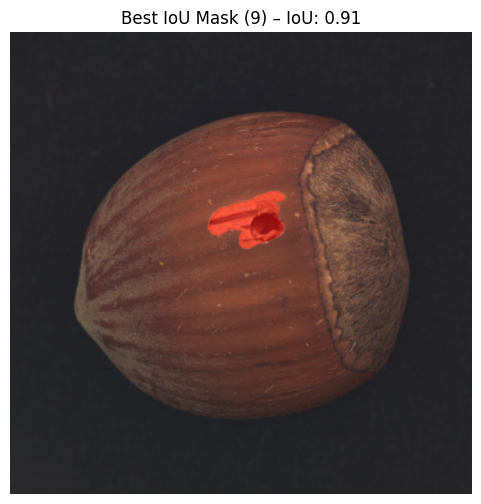

In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

checkpoint = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg  = "configs/sam2.1/sam2.1_hiera_l.yaml"
device     = "cuda"

model = build_sam2(model_cfg, checkpoint).to(device)
mask_generator = SAM2AutomaticMaskGenerator(
    model=model,
    points_per_side=64,
    pred_iou_thresh=0.6,
    stability_score_thresh=0.5,
    mask_threshold=0.5,
    box_nms_thresh=0.7,
    crop_n_layers=2,
    crop_overlap_ratio=0.2,
    crop_n_points_downscale_factor=1,
    min_mask_region_area=300,
    output_mode="binary_mask",
    multimask_output=True,
    use_m2m=False
)

image_path = "/home/s2behappy4/data/gyuhyeong/dataset/MMAD/MVTec-AD/hazelnut/test/hole/000.png"
pil_image  = Image.open(image_path).convert("RGB")
image_np   = np.array(pil_image)

masks = mask_generator.generate(image_np)
print(f"Generated {len(masks)} masks")

alpha = 0.5
overlay_list = []   
mask_list    = []   

for i, ann in enumerate(masks):
    seg = ann["segmentation"]             

    overlay = image_np.astype(np.float32).copy()
    overlay[seg] = (1 - alpha) * image_np[seg] + alpha * np.array([255, 0, 0])
    overlay_img = Image.fromarray(overlay.astype(np.uint8))

    overlay_list.append(overlay_img)
    mask_list.append(torch.from_numpy(seg.astype(np.uint8)))

print(f"✅ Collected {len(overlay_list)} overlays and {len(mask_list)} masks")

gt_path = "/home/s2behappy4/data/gyuhyeong/dataset/MMAD/MVTec-AD/hazelnut/ground_truth/hole/000_mask.png"
gt_mask = np.array(Image.open(gt_path).convert("L")) > 0

def compute_iou(pred, gt):
    inter = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()
    return inter / union if union > 0 else 0.0

ious = [compute_iou(m.numpy().astype(bool), gt_mask) for m in mask_list]

best_idx = int(np.argmax(ious))
best_seg = mask_list[best_idx].numpy().astype(bool)

best_overlay = image_np.astype(np.float32).copy()
best_overlay[best_seg] = (1 - alpha) * image_np[best_seg] + alpha * np.array([255, 0, 0])

plt.figure(figsize=(6,6))
plt.imshow(best_overlay.astype(np.uint8))
plt.title(f"Best IoU Mask ({best_idx}) – IoU: {ious[best_idx]:.2f}")
plt.axis("off")
plt.show()

In [ ]:
import os
import torch

base_dir   = "/home/s2behappy4/data/gyuhyeong/code/overlays/hazelnut"
os.makedirs(base_dir, exist_ok=True)

for i, (overlay_img, mask_t) in enumerate(zip(overlay_list, mask_list)):
    overlay_path = os.path.join(base_dir, f"overlay_{i:02d}.png")
    overlay_img.save(overlay_path)

    mask_path = os.path.join(base_dir, f"mask_{i:02d}.pt")
    torch.save(mask_t, mask_path)

print(f"✅ Saved {len(overlay_list)} overlays and {len(mask_list)} masks to\n   {base_dir}")

# # Screw

Generated 47 masks
✅ Collected 47 overlays and 47 masks


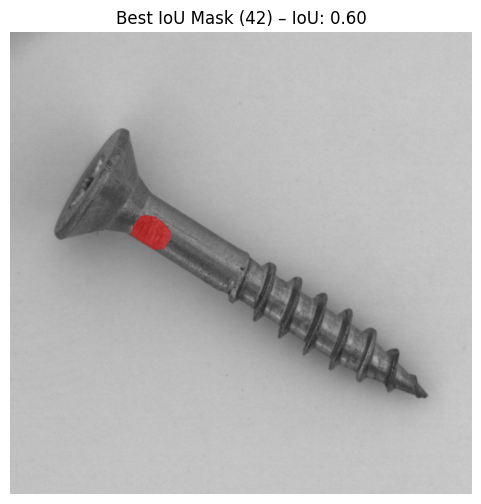

In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

checkpoint = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg  = "configs/sam2.1/sam2.1_hiera_l.yaml"
device     = "cuda"

model = build_sam2(model_cfg, checkpoint).to(device)
mask_generator = SAM2AutomaticMaskGenerator(
    model=model,
    points_per_side=64,
    pred_iou_thresh=0.4,
    stability_score_thresh=0.4,
    mask_threshold=0.3,
    box_nms_thresh=0.8,
    crop_n_layers=2,
    crop_overlap_ratio=0.2,
    crop_n_points_downscale_factor=1,
    min_mask_region_area=300,
    output_mode="binary_mask",
    multimask_output=True,
    use_m2m=False
)

image_path = "/home/s2behappy4/data/gyuhyeong/dataset/MMAD/MVTec-AD/screw/test/scratch_neck/000.png"
pil_image  = Image.open(image_path).convert("RGB")
image_np   = np.array(pil_image)

masks = mask_generator.generate(image_np)
print(f"Generated {len(masks)} masks")

alpha = 0.5
overlay_list = []   
mask_list    = []   

for i, ann in enumerate(masks):
    seg = ann["segmentation"]               

    overlay = image_np.astype(np.float32).copy()
    overlay[seg] = (1 - alpha) * image_np[seg] + alpha * np.array([255, 0, 0])
    overlay_img = Image.fromarray(overlay.astype(np.uint8))

    overlay_list.append(overlay_img)
    mask_list.append(torch.from_numpy(seg.astype(np.uint8)))

print(f"✅ Collected {len(overlay_list)} overlays and {len(mask_list)} masks")

gt_path = "/home/s2behappy4/data/gyuhyeong/dataset/MMAD/MVTec-AD/screw/ground_truth/scratch_neck/000_mask.png"
gt_mask = np.array(Image.open(gt_path).convert("L")) > 0

def compute_iou(pred, gt):
    inter = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()
    return inter / union if union > 0 else 0.0

ious = [compute_iou(m.numpy().astype(bool), gt_mask) for m in mask_list]

best_idx = int(np.argmax(ious))
best_seg = mask_list[best_idx].numpy().astype(bool)

best_overlay = image_np.astype(np.float32).copy()
best_overlay[best_seg] = (1 - alpha) * image_np[best_seg] + alpha * np.array([255, 0, 0])

plt.figure(figsize=(6,6))
plt.imshow(best_overlay.astype(np.uint8))
plt.title(f"Best IoU Mask ({best_idx}) – IoU: {ious[best_idx]:.2f}")
plt.axis("off")
plt.show()

In [2]:
import os
import torch

base_dir   = "/home/s2behappy4/data/gyuhyeong/code/overlays/screw"
os.makedirs(base_dir, exist_ok=True)

for i, (overlay_img, mask_t) in enumerate(zip(overlay_list, mask_list)):
    overlay_path = os.path.join(base_dir, f"overlay_{i:02d}.png")
    overlay_img.save(overlay_path)

    mask_path = os.path.join(base_dir, f"mask_{i:02d}.pt")
    torch.save(mask_t, mask_path)

print(f"✅ Saved {len(overlay_list)} overlays and {len(mask_list)} masks to\n   {base_dir}")

✅ Saved 47 overlays and 47 masks to
   /home/s2behappy4/data/gyuhyeong/code/overlays/screw


# # Hazelnut class

In [ ]:
import os, cv2, torch, numpy as np, matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

root    = "/home/s2behappy4/data/gyuhyeong/dataset/MMAD/MVTec-AD/hazelnut"
out_dir = "/home/s2behappy4/data/gyuhyeong/code/overlays/hazelnut"
os.makedirs(out_dir, exist_ok=True)

device     = "cuda"
checkpoint = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg  = "configs/sam2.1/sam2.1_hiera_l.yaml"

model = build_sam2(model_cfg, checkpoint).to(device)
mask_generator = SAM2AutomaticMaskGenerator(
    model=model,
    points_per_side=64,
    pred_iou_thresh=0.6,
    stability_score_thresh=0.5,
    mask_threshold=0.5,
    box_nms_thresh=0.7,
    crop_n_layers=2,
    crop_overlap_ratio=0.2,
    crop_n_points_downscale_factor=1,
    min_mask_region_area=300,
    output_mode="binary_mask",
    multimask_output=True,
    use_m2m=False
)

def compute_iou(pred: np.ndarray, gt: np.ndarray) -> float:
    inter = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()
    return inter / union if union else 0.0

defect_types = ["crack", "cut", "hole", "print"]
target_imgs  = ["000.png", "001.png"]
alpha        = 0.5
total_tasks  = len(defect_types) * len(target_imgs)

with tqdm(total=total_tasks, desc="Images processed") as pbar:
    for d_type in defect_types:
        class_out = os.path.join(out_dir, d_type)
        os.makedirs(class_out, exist_ok=True)

        for img_name in target_imgs:
            img_path = f"{root}/test/{d_type}/{img_name}"
            gt_path  = f"{root}/ground_truth/{d_type}/{img_name.replace('.png','')}_mask.png"
            if not (os.path.exists(img_path) and os.path.exists(gt_path)):
                pbar.write(f"[경고] {img_path} 또는 GT 누락")
                pbar.update(1)
                continue

            rgb = np.array(Image.open(img_path).convert("RGB"))
            gt  = np.array(Image.open(gt_path).convert("L")) > 0

            masks = mask_generator.generate(rgb)
            if not masks:
                pbar.write(f"[{d_type}/{img_name}] No mask generated.")
                pbar.update(1)
                continue

            best_iou, best_overlay = -1.0, None
            stem_base = img_name.replace(".png", "")

            for idx, ann in enumerate(
                tqdm(masks, desc=f"{d_type}/{stem_base} masks", leave=False)
            ):
                seg = ann["segmentation"].astype(bool)

                overlay = rgb.astype(np.float32).copy()
                overlay[seg] = (1 - alpha) * rgb[seg] + alpha * np.array([255, 0, 0])
                overlay = overlay.astype(np.uint8)

                stem = f"{stem_base}_m{idx:02d}"

                cv2.imwrite(
                    f"{class_out}/{stem}_overlay.png",
                    cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR),
                )

                torch.save(
                    torch.from_numpy(seg.astype(np.uint8)),
                    f"{class_out}/{stem}_mask.pt",
                )

                iou = compute_iou(seg, gt)
                if iou > best_iou:
                    best_iou, best_overlay = iou, overlay

            pbar.write(
                f"[{d_type}/{img_name}] saved {len(masks)} overlays – best IoU {best_iou:.3f}"
            )
            pbar.update(1)

            plt.figure(figsize=(4, 4))
            plt.imshow(best_overlay)
            plt.title(f"{d_type}/{img_name}  IoU={best_iou:.3f}")
            plt.axis("off")
            plt.show()